#Loop through all .mat files in the directory

In [100]:
mat_files_dir = r"D:\Data\AFLW2000" 

combined_data =[]


for filename in os.listdir(mat_files_dir): 
    if filename .endswith(".mat"): 
        #load the .mat file 
        file_path=os.path.join(mat_files_dir,filename )
        mat_file=scipy.io.loadmat(file_path)
        # Replace 'variable_name' with the actual name of the row vector in your .mat files
        row_vector = mat_file['Pose_Para']  # Extract the row vector

        # Convert the row vector to a DataFrame and append it to the combined_data list
        df = pd.DataFrame(row_vector)
        combined_data.append(df)

# Concatenate all DataFrames to create a single dataset
final_dataset = pd.concat(combined_data, ignore_index=True)

# Save the final dataset to a CSV file
final_dataset.to_csv('combined_dataset.csv', index=False)

# Print the combined dataset (optional)
print(final_dataset)

             0         1         2           3           4           5  \
0    -0.399231  0.018227  0.085676  231.465317  262.066589 -102.793602   
1     0.470065  1.189533  0.300959  330.819702  173.194244  -44.367504   
2    -0.184650  0.881137 -0.236852  301.050323  200.051437  -48.590317   
3    -0.175379  0.299208 -0.373374  262.805054  211.201294 -102.680016   
4    -0.882169  1.198004 -1.033374  323.511200  218.552780  -21.119057   
...        ...       ...       ...         ...         ...         ...   
1995 -0.197102 -0.070430  0.105118  217.692688  226.295181 -114.195282   
1996 -0.232617 -1.418751  0.175960  103.658447  191.368881   -5.541234   
1997 -1.447955  1.431267 -1.509418  336.144867  204.937408  -20.417292   
1998 -0.420465 -1.191176  0.451515  110.517296  219.579651  -31.363331   
1999 -0.015552 -0.180126 -0.024546  206.357895  197.621613 -105.898392   

             6  
0     0.001587  
1     0.001181  
2     0.001041  
3     0.001294  
4     0.001247  
...      

In [101]:
final_dataset

,0,1,2,3,4,5,6
0,-0.399231,0.018227,0.085676,231.465317,262.066589,-102.793602,0.001587
1,0.470065,1.189533,0.300959,330.819702,173.194244,-44.367504,0.001181
2,-0.184650,0.881137,-0.236852,301.050323,200.051437,-48.590317,0.001041
3,-0.175379,0.299208,-0.373374,262.805054,211.201294,-102.680016,0.001294
4,-0.882169,1.198004,-1.033374,323.511200,218.552780,-21.119057,0.001247
...,...,...,...,...,...,...,...
1995,-0.197102,-0.070430,0.105118,217.692688,226.295181,-114.195282,0.001546
1996,-0.232617,-1.418751,0.175960,103.658447,191.368881,-5.541234,0.001287
1997,-1.447955,1.431267,-1.509418,336.144867,204.937408,-20.417292,0.001289
1998,-0.420465,-1.191176,0.451515,110.517296,219.579651,-31.363331,0.001396


In [102]:
final_dataset.shape

(2000, 7)

In [103]:
final_dataset=final_dataset.drop([3,4,5,6],axis=1)

In [105]:
final_dataset.columns = ['Yaw', 'Pitch', 'Roll']  
print(final_dataset)


           Yaw     Pitch      Roll
0    -0.399231  0.018227  0.085676
1     0.470065  1.189533  0.300959
2    -0.184650  0.881137 -0.236852
3    -0.175379  0.299208 -0.373374
4    -0.882169  1.198004 -1.033374
...        ...       ...       ...
1995 -0.197102 -0.070430  0.105118
1996 -0.232617 -1.418751  0.175960
1997 -1.447955  1.431267 -1.509418
1998 -0.420465 -1.191176  0.451515
1999 -0.015552 -0.180126 -0.024546

[2000 rows x 3 columns]


In [108]:
import scipy.io as io
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


# preparing the data

In [109]:
import glob
files=glob.glob(f'{directory}/*.jpg')


In [110]:
# Lists to store data
images = []
marks_values = []
pitch = []
yaw = []
roll = []

In [111]:
# Iterate over image files
with mp_face_mesh.FaceMesh(static_image_mode=True) as faces:

    for i, file in enumerate(files):
        image = cv2.imread(file)
        if image is None:
            print(f'Failed to load file {file.split("AFLW2000")[-1]}')
            continue

        mat_file = file.replace('jpg', 'mat')
        mat_file = io.loadmat(mat_file)
        if mat_file is None:
            print(f'Failed to load file {mat_file.split("AFLW2000")[-1]}')
            continue

        # Convert the image to RGB format (required for Mediapipe)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image to extract landmark points
        results = faces.process(image_rgb)
        
        if results.multi_face_landmarks is None :
            continue
        
        
                    # Draw only the landmarks on the image
            if results.multi_face_landmarks:
                for face_landmarks in results.multi_face_landmarks:
                    for idx, landmark in enumerate(face_landmarks.landmark):
                        # Get the position of the landmarks
                        h, w, _ = image.shape
                        x, y = int(landmark.x * w), int(landmark.y * h)

        
        # Extract labels from mat file
        pose_para = mat_file["Pose_Para"][0][:3]
        p, y, r = pose_para[0], pose_para[1], pose_para[2]
        
        # Append values to lists
        marks_values.append(np.concatenate([x_val,y_val]))
        pitch.append(p)
        yaw.append(y)
        roll.append(r)
        images.append(file.split("image")[-1].split('.')[0][1:])

# Create DataFrame
data = {
    'Image_Id': images,
    'marks_Values': marks_values,
    'Pitch': pitch,
    'Yaw': yaw,
    'Roll': roll
}
data
df = pd.DataFrame(data)

In [112]:
df 

,Image_Id,marks_Values,Pitch,Yaw,Roll
0,0002,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.399231,0.018227,0.085676
1,0004,"[0.010506494985412547, 0.0, -0.004634944769768...",0.470065,1.189533,0.300959
2,0006,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.184650,0.881137,-0.236852
3,0008,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.175379,0.299208,-0.373374
4,0013,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.026812,0.011965,-0.220662
...,...,...,...,...,...
1848,4345,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.306358,-0.283822,0.038554
1849,4348,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.367547,-0.429723,0.122791
1850,4356,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.156035,0.567114,-0.108536
1851,4358,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.197102,-0.070430,0.105118


# Convert Radian values to Degrees values

In [113]:
import math 
df['Pitch_D']=df['Pitch']*180/math.pi
df['Yaw_D'] = df['Yaw'] * 180 / math.pi
df['Roll_D'] = df['Roll'] * 180 / math.pi

df.head()

,Image_Id,marks_Values,Pitch,Yaw,Roll,Pitch_D,Yaw_D,Roll_D
0,0002,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.399231,0.018227,0.085676,-22.874239,1.044306,4.908886
1,0004,"[0.010506494985412547, 0.0, -0.004634944769768...",0.470065,1.189533,0.300959,26.932742,68.155241,17.243670
2,0006,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.184650,0.881137,-0.236852,-10.579652,50.485412,-13.570645
3,0008,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.175379,0.299208,-0.373374,-10.048456,17.143374,-21.392783
4,0013,"[0.010506494985412547, 0.0, -0.004634944769768...",-0.026812,0.011965,-0.220662,-1.536199,0.685565,-12.643008


# EDA

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image_Id      1853 non-null   object 
 1   marks_Values  1853 non-null   object 
 2   Pitch         1853 non-null   float64
 3   Yaw           1853 non-null   float64
 4   Roll          1853 non-null   float64
 5   Pitch_D       1853 non-null   float64
 6   Yaw_D         1853 non-null   float64
 7   Roll_D        1853 non-null   float64
dtypes: float64(6), object(2)
memory usage: 115.9+ KB


In [115]:
df.describe()

,Pitch,Yaw,Roll,Pitch_D,Yaw_D,Roll_D
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,-0.095366,0.013611,-0.033167,-5.464084,0.779830,-1.900304
std,0.549292,0.580266,0.649282,31.472127,33.246773,37.201145
min,-12.457202,-6.130066,-16.969362,-713.745097,-351.226933,-972.272838
25%,-0.246453,-0.256714,-0.160274,-14.120730,-14.708650,-9.182996
50%,-0.123371,0.019403,-0.017463,-7.068623,1.111730,-1.000572
75%,0.028133,0.305791,0.126460,1.611882,17.520538,7.245619
max,15.598820,3.277500,2.166107,893.746536,187.786940,124.108772


In [116]:
def map_to_pi(angle):

    return (angle + np.pi) % (2 * np.pi) - np.pi

In [117]:
df[['Pitch', 'Yaw', 'Roll']] = df[['Pitch', 'Yaw', 'Roll']].apply(map_to_pi)

In [118]:
df.describe()

,Pitch,Yaw,Roll,Pitch_D,Yaw_D,Roll_D
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,-0.098757,0.013611,-0.006040,-5.464084,0.779830,-1.900304
std,0.298296,0.561701,0.340730,31.472127,33.246773,37.201145
min,-2.864633,-3.005685,-1.944989,-713.745097,-351.226933,-972.272838
25%,-0.246453,-0.256714,-0.159251,-14.120730,-14.708650,-9.182996
50%,-0.123371,0.019403,-0.015933,-7.068623,1.111730,-1.000572
75%,0.028133,0.304979,0.128125,1.611882,17.520538,7.245619
max,3.032449,1.489062,2.778426,893.746536,187.786940,124.108772


In [119]:
df.isnull().sum()

Image_Id        0
marks_Values    0
Pitch           0
Yaw             0
Roll            0
Pitch_D         0
Yaw_D           0
Roll_D          0
dtype: int64

In [120]:
summary_stats = df.describe()

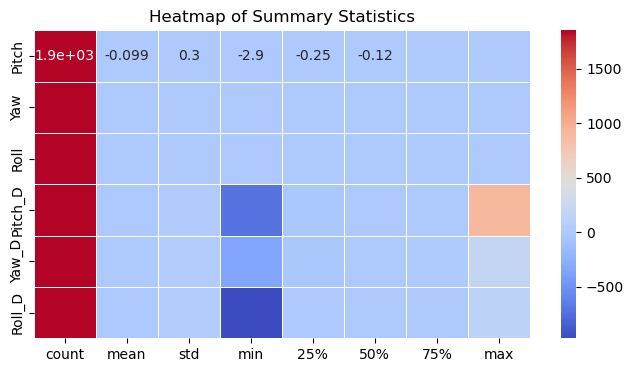

In [121]:
# Create a heatmap for the summary statistics
plt.figure(figsize=(8, 4))
sns.heatmap(summary_stats.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Summary Statistics')
plt.show()


# Declare feature vectors and target variables 

In [123]:
X=np.array(df['marks_Values'].tolist())
y = np.array(df[['Pitch', 'Yaw', 'Roll']])
print(X.shape, y.shape)

(1853, 936) (1853, 3)


# Split the data into training and testing sets

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

#apply Linear Regression
model_REG=LinearRegression()
model_REG.fit(X_train,y_train)

#make predictions
y_pred=model_REG.predict(X_test)


In [129]:
# Evaluation the model 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.6095162296266808e+21
R-squared: -8.82339711280564e+21
